In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from sympy.abc import b, g, u, omega, theta
from numpy.linalg import inv
from numpy import cos, sin

### Problem 1.1 

Finding the state evolution in terms of the drift and input dynamics.

In [2]:
et, etdot, ei, eiei_oh, ew, ewdot = sp.symbols('e_{\\theta},\dot{e_{\\theta}},e_I,\dot{e_I},e_omega,\dot{e_\omega}')
thetadot, thetad, wdot = sp.symbols('\dot{\\theta},\\theta_{d},\dot{\omega}')
DELTA = sp.symbols('\Delta')
D, J,Kb, Kt, L, La, M, N1, N2, Ra = sp.symbols('D,J,K_b,K_t,L,L_a,M,N_1,N_2,R_a')

In [3]:
# Symbolics 
etk, etk1 = sp.symbols('e_{\\theta}{(k)},e_{\\theta}{(k+1)}')
ewk, ewk1 = sp.symbols('e_{\omega}{(k)},e_{\omega}{(k+1)}')
eik, eik1 = sp.symbols('e_{I}{(k)},e_{I}{(k+1)}')
fx_sym, gx_sym = sp.symbols('f(x_{k}),g(x_{k})')
Delta = 0.01 # s
Da = 0.1 # Nms/rad
Dl = 1 # Nms/rad
g_val = 9.81 #m/s^2
Ja = 2 # kgm2/rad
Kb_val = 6.36 # Dimensionless
Kt_val = 11 # Dimensionless
L_val = 1 # m
La_val = 0.1 # H
M_val = 5 # kg
N1_val = 15 # teeth
N2_val = 45 # teeth
Ra_val = 10 # Ohm

# Equilibrium points
thetad_val = np.pi/6
Ibar = N1_val/(Kt_val*N2_val)*M_val*g_val*sin(N1_val/N2_val*thetad_val)

sub_lst = [(DELTA, Delta), 
           (D, Da + (N1_val/N2_val)**2*Dl), 
           (N1/N2, N1_val/N2_val), 
           (J, Ja + (N1_val/N2_val)**2*M*L**2), 
           (Kb, Kb_val), 
           (Kt, Kt_val),
           (g, g_val),
           (L, L_val),
           (La, La_val),
           (M, M_val),
           (N1, N1_val),
           (N2, N2_val),
           (Ra, Ra_val),
           (thetad, thetad_val)]

# Maths for 3a
_etdot = sp.Eq(etdot, omega)
_ew = sp.Eq(ew, omega)
_etdot_subs = _etdot.subs(omega, ew)
_edot_forward = sp.Eq((etk1 - etk)/DELTA, _etdot_subs.rhs)
_edot_euler = sp.Eq(etk1, sp.solve(_edot_forward, etk1)[0]).subs([(et, etk),
                                                                  (ew, ewk),
                                                                  (ei, eik)])
_etdot_vals = _edot_euler.subs(sub_lst)

# Maths for 3b
_3b = sp.Eq(J*wdot + D*omega + M*g*L*N1/N2*(sp.sin(N1/N2*(et + thetad)) - sp.sin(N1/N2*thetad)), Kt*ei)
_3b_subs = _3b.subs([(wdot, ewdot), (omega, ew)])
_3b_isolate = sp.Eq(ewdot, sp.solve(_3b_subs, ewdot)[0])
_3b_forward = sp.Eq((ewk1 - ewk)/DELTA, _3b_isolate.rhs)
_3b_euler = sp.Eq(ewk1, sp.solve(_3b_forward, ewk1)[0]).subs([(et, etk),
                                                              (ew, ewk),
                                                              (ei, eik)])
_3b_vals = sp.simplify(sp.expand(sp.N(_3b_euler.subs(sub_lst))))

# Maths for 3c 
_3c = sp.Eq(La*eiei_oh + Ra*ei + Kb*omega, u)
_3c_subs = sp.Eq(eiei_oh, sp.solve(_3c.subs(omega, ew), eiei_oh)[0])
_3c_forward = sp.Eq((eik1 - eik)/DELTA, _3c_subs.rhs)
_3c_euler = sp.Eq(eik1, sp.solve(_3c_forward, eik1)[0]).subs([(et, etk),
                                                              (ew, ewk), 
                                                              (ei, eik)])
_3c_vals = _3c_euler.subs(sub_lst)

# Input and drift dynamics 
_fx = sp.Matrix([[_edot_euler.rhs], [_3b_euler.rhs], [_3c_euler.rhs.subs(u, 0)]])
_gx = sp.Matrix([[0], [0], [_3c_euler.rhs]]).subs([(etk, 0), 
                                                   (ewk, 0), 
                                                   (eik, 0),
                                                   (u, 1)])

fxt, fxw, fxi = sp.symbols('f_\\theta{(k+1)},fx_\omega{(k+1)},fi{(k+1)}')
gxt, gxw, gxi = sp.symbols('g_\\theta{(k+1)},g_\omega{(k+1)},g_i{(k+1)}')

_fx_subs = _fx.subs(sub_lst)
_gx_subs = _gx.subs(sub_lst)

#### Equation 3a) 

Start of by substituting {{_ew}} into equation 3a which yields, 

{{_etdot_subs}}

Using Euler's forward transfomration 

{{_edot_forward}}

Then, 

{{_edot_euler}}

The numerical values then become, 

{{_etdot_vals}}

#### Equation 3b) 

Start of by substituting {{_ew}} into equation 3b which yields, 

{{_3b_subs}}

Isolating for {{ewdot}}, 

{{_3b_isolate}}

Using Euler's forward transfomration 

{{_3b_forward}}

Then, 

{{_3b_euler}}

The numerical values then become, 

{{_3b_vals.evalf(4)}}

#### Equation 3c) 

Start of by substituting {{_ew}} into equation 3b which yields, 

{{_3c_subs}}

Using Euler's forward transfomration 

{{_3c_forward}}

Then, 

{{_3c_euler}}

The numerical values then become, 

{{_3c_vals}}

#### Drift and Input Dynamics

The symbolic representation of the drift, $f_x$ dynamics and the input, $g_x$ dynamics are, 

{{display(sp.Eq(sp.Matrix([fxt, fxw, fxi]), _fx))}}

{{display(sp.Eq(sp.Matrix([gxt, gxw, gxi]), _gx))}}

Numerically these evaluate to, 

{{display(sp.Eq(sp.Matrix([fxt, fxw, fxi]), _fx_subs.evalf(4)))}}

{{display(sp.Eq(sp.Matrix([gxt, gxw, gxi]), _gx_subs))}}

In [4]:
# Symbolic Declaration
uk, x1k, x2k, x3k = sp.symbols('u_k,x_{1}(k),x_{2}(k),x_{3}(k)')
w1, w2, w3, w4, w5, w6, w7, w8, w9 = sp.symbols('w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9')

# Input dynamics (constant)
gx = np.array([0, 0, 0.1]).reshape(-1,1)

# Lambda function for drift and input dynamics
_measure = _fx_subs + _gx_subs*uk
measure_func = sp.lambdify([etk, ewk, eik, uk], _measure)

# State vector definition (3x1)
_X = sp.Matrix([x1k, x2k, x3k]).reshape(3,1)

# Regressor vector definition (9x1)
_phi = sp.Matrix([x1k, x2k, x3k,
                  x1k*x2k, x1k*x3k, x2k*x3k,
                  x1k**2, x2k**2, x3k**2])
phi_func = sp.lambdify([x1k, x2k, x3k], _phi)

# Regressor derivative vector (9x3)
_phi_der = sp.zeros(len(sp.diff(_phi, x1k)), len(_X))
for idx, state in enumerate(_X):
    _phi_der[:, idx] = sp.diff(_phi, state)
phi_der_func = sp.lambdify([x1k, x2k, x3k], _phi_der)

# Constant Values 
Q = np.eye(len(_X)) # (3x3)
R = np.array([0.05]).reshape(1,) # (scalar)

# Cost function 
_r = _X.T@Q@_X + (R*uk**2).reshape(-1,1)
r_func = sp.lambdify([x1k, x2k, x3k, uk], _r)

In [5]:
# display(_measure)
# display(_X)
# display(_phi) # Used for troubleshooting
# display(_phi_der) # Used for troubleshooting
# display(_r) # Used for troubleshooting

### Problem 1.2

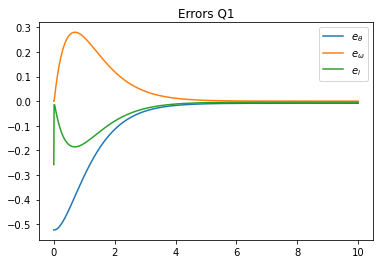

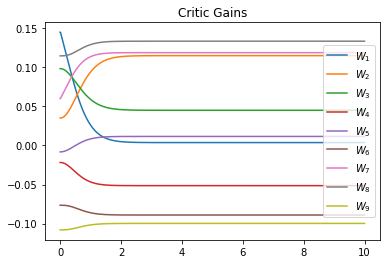

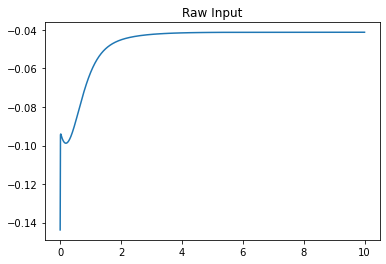

In [65]:
final_time = 10
time = np.arange(0, final_time + Delta, Delta)
k, kmax = 0, len(time)
ALPHA, GAMMA = 0.01, 0.9
eps_critic = 1e-6

# Initial assignments of the states, randomly initialized weights and the input
X = np.array([0 - thetad_val, 0, 0 - Ibar], float).reshape(-1,1) # Initial error states 
X_vals = X

# Initialize W weights sampled randomly form N(0, 0.1)
W = np.array([np.random.normal(0, scale=0.1)])
for i in range(8):
    W = np.concatenate((W, np.array([np.random.normal(0, scale=0.1)])), axis=0)
W = W.reshape(-1,1)
W_vals = W # List of previous weights

# Calculate the first control action
u = (-GAMMA/(2*R)@gx.T@phi_der_func(X[0][0], X[1][0], X[2][0]).T@W).reshape(-1,)
u_vals = np.array(u).reshape(-1,) # List of all control actions (policy)

# First loop to iterate through time
while k <= kmax:
    
    # Store x_{k} into Xk 
    Xk = X
    # Find the next value of the states x_k+1 and assign it to X
    X = measure_func(X[0], X[1], X[2], u[0]).reshape(-1,1)
    # Append to the list of previous states
    X_vals = np.concatenate((X_vals, X), axis=1) # Append to states
    
    # Calculate the Value function from Bellman's equation with the approximation. 
    # val_approx = phi(x_{k})^T@W_{j+1} = r(x_{k}, hj(x_{k}) + gamma*phi^{T}W_{j})
    val_approx = r_func(Xk[0][0], Xk[1][0], Xk[2][0], u[0]) + GAMMA*phi_func(X[0][0], X[1][0], X[2][0]).T@W_vals[:,-1]
    
    Wj = W_vals[:, -1] # Current critic gains - previously converged
    Wj_iter = W_vals[:, -1].reshape(-1,1) # Current critic gains
    
    u = u_vals[-1].reshape(-1,) # Current control action
    conv_critic = False
    k += 1
    
    # Policy evaluation loop. Here we will iterate through the critic weights until 
    # a convergence criteria is met
    while not conv_critic:
        # Current phi vector
        phi_lop = phi_func(Xk[0][0], Xk[1][0], Xk[2][0])
        
        # Store current critic weights
        W_temp = Wj_iter
        # Update critic weights with GD
        update = ALPHA*phi_lop@(phi_lop.T@Wj_iter - val_approx)
        Wj_iter -= update
        W_vals = np.concatenate((W_vals, Wj_iter), axis=1) # Append to list
        
        # Take a new measurement
        Xk = X
        X = measure_func(X[0], X[1], X[2], u[0]).reshape(-1,1)
        X_vals = np.concatenate((X_vals, X), axis=1)
        
        # Calculate the next control action and append to list
        u = (-GAMMA/(2*R)@gx.T@phi_der_func(X[0][0], X[1][0], X[2][0]).T@Wj).reshape(-1,)
        u_vals = np.concatenate((u_vals, u), axis=0)
        
        # Find the function approximation 
        val_approx = r_func(Xk[0][0], Xk[1][0], Xk[2][0], u[0]) + GAMMA*phi_func(X[0][0], X[1][0], X[2][0]).T@Wj
        # Check for convergence or timeout
        if update.sum() < eps_critic:
            conv_critic = True
        k += 1
    # Append converged values to the critic list
    W_vals = np.concatenate((W_vals, Wj_iter), axis=1)
    
    # Calculate control action with the new converged parameters
    u = (-GAMMA/(2*R)@gx.T@phi_der_func(X[0][0], X[1][0], X[2][0]).T@Wj_iter).reshape(-1,)
    u_vals = np.concatenate((u_vals, u)).reshape(-1,)
    
for state in X_vals:
    plt.plot(time, state[0:len(time)])
plt.legend(['$e_{\\theta}$', '$e_{\omega}$', '$e_i$'])
plt.title('Errors Q1')
plt.show()

for gain in W_vals:
    plt.plot(time, gain[0:len(time)])
plt.legend(['$W_1$', 
            '$W_2$', 
            '$W_3$', 
            '$W_4$', 
            '$W_5$', 
            '$W_6$', 
            '$W_7$', 
            '$W_8$', 
            '$W_9$'], loc='center right')
plt.title('Critic Gains')
plt.show()

plt.plot(time, u_vals[0:len(time)])
plt.title('Raw Input')
plt.show()

### Problem 1.3

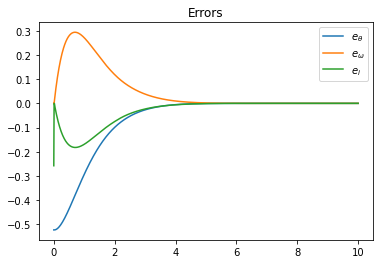

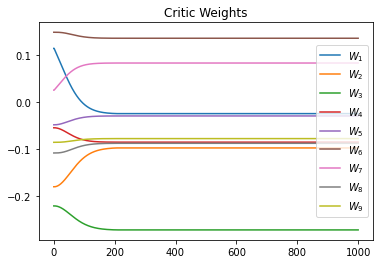

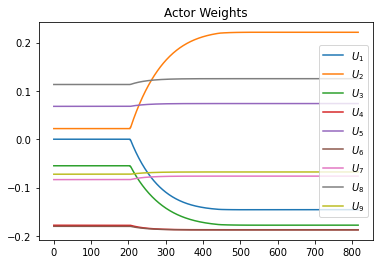

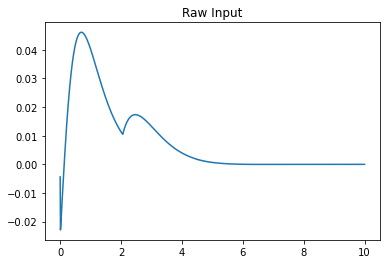

In [79]:
final_time = 10
time = np.arange(0, final_time + Delta, Delta)
k, kmax = 0, len(time)
ALPHA, BETA, GAMMA = 0.01, 1, 0.9
eps_critic = 1e-5
eps_actor = 1e-5

std_critic = 0.1
std_actor = 0.1

# Initial assignments of the states, randomly initialized weights and the input
X = np.array([0 - thetad_val, 0, 0 - Ibar], float).reshape(-1,1) # Initial error states 
X_vals = X

# Initialize W weights sampled randomly form N(0, 0.1)
W = np.array([np.random.normal(0, scale=std_critic)])
for i in range(8):
    W = np.concatenate((W, np.array([np.random.normal(0, scale=0.1)])), axis=0)
W = W.reshape(-1,1)
W_vals = W # List of previous weights

# Initialize W weights sampled randomly form N(0, 0.1)
U = np.array([np.random.normal(0, scale=0.)])
for i in range(8):
    U = np.concatenate((U, np.array([np.random.normal(0, scale=std_actor)])), axis=0)
U = U.reshape(-1,1)
U_vals = U # List of previous weights

# Calculate the first control action using the actor gain approximaiton
u = (phi_func(X[0][0], X[1][0], X[2][0]).T@U).reshape(-1,)
u_vals = np.array(u).reshape(-1,) # List of all control actions (policy)

# First loop to iterate through time
while k <= kmax:
    
    # Store x_{k} into Xk 
    Xk = X
    # Find the next value of the states x_k+1 and assign it to X
    X = measure_func(X[0], X[1], X[2], u[0]).reshape(-1,1)
    # Append to the list of previous states
    X_vals = np.concatenate((X_vals, X), axis=1) # Append to states
    
    # Calculate the Value function from Bellman's equation with the approximation. 
    # val_approx = phi(x_{k})^T@W_{j+1} = r(x_{k}, hj(x_{k}) + gamma*phi^{T}W_{j})
    val_approx = (r_func(Xk[0][0], Xk[1][0], Xk[2][0], u[0]) + GAMMA*phi_func(X[0][0], X[1][0], X[2][0]).T@W_vals[:,-1]).reshape(-1,)
    
    Wj = W_vals[:, -1] # Current critic gains - previously converged
    Wj_iter = W_vals[:, -1].reshape(-1,1) # Current critic gains
    
    Uj = U_vals[:, -1] # Current actor gains - previously converged
    
    u = u_vals[-1].reshape(-1,) # Current control action
    conv_critic = False
    k += 1
    
    # Value evaluation loop. Here we will iterate through the critic weights until 
    # a convergence criteria is met
    while not conv_critic:
        # Current phi vectore=
        phi_lop = phi_func(Xk[0][0], Xk[1][0], Xk[2][0])
        
        # Store current critic weights
        W_temp = Wj_iter
        # Update critic weights with GD
        update = ALPHA*phi_lop@(phi_lop.T@Wj_iter - val_approx)
        Wj_iter -= update
        W_vals = np.concatenate((W_vals, Wj_iter), axis=1) # Append to list
        
        # Take a new measurement
        Xk = X
        X = measure_func(X[0], X[1], X[2], u[0]).reshape(-1,1)
        X_vals = np.concatenate((X_vals, X), axis=1)
        
        # Calculate the next control action and append to list using the x_{k} 
        # and holding the actor weights constant
        u = phi_func(Xk[0][0], Xk[1][0], Xk[2][0]).T@Uj
        u_vals = np.concatenate((u_vals, u), axis=0)
        U_vals = np.concatenate((U_vals, U_vals[:,-1].reshape(-1,1)), axis=1)
        
        # Find the function approximation 
        val_approx = r_func(Xk[0][0], Xk[1][0], Xk[2][0], u[0]) + GAMMA*phi_func(X[0][0], X[1][0], X[2][0]).T@Wj
        # Check for convergence or timeout
        if update.sum() < eps_critic:
            conv_critic = True
        k += 1
    # Append converged values to the critic list and current control action 
    # to the control action list
    W_vals = np.concatenate((W_vals, Wj_iter), axis=1)
    u_vals = np.concatenate((u_vals, u), axis=0)
    
    # Storing the converged critic weights and setting up place holders to 
    # iterate over the actor weights until convergence
    Wj = W_vals[:, -1]
    Uj = U_vals[:, -1]
    Uj_iter = U_vals[:, -1].reshape(-1,1)
    conv_actor = False
    
    while not conv_actor:
        # Current phi vector
        phi_lop = phi_func(Xk[0][0], Xk[1][0], Xk[2][0])
        phi_der_lop = phi_der_func(X[0][0], X[1][0], X[2][0])
        
        U_temp = Uj_iter
        update = BETA*phi_lop*(2*R@phi_lop.T@Uj_iter + GAMMA*gx.T@phi_der_lop.T@Wj)
        Uj_iter -= update
        u = phi_lop.T@Uj_iter
        
        W_vals = np.concatenate((W_vals, Wj_iter), axis=1)
        u_vals = np.concatenate((u_vals, u.reshape(-1,)), axis=0)
        U_vals = np.concatenate((U_vals, Uj_iter), axis=1)
        
        # Take a new measurement
        Xk = X
        X = measure_func(X[0], X[1], X[2], u[0]).reshape(-1,1)
        X_vals = np.concatenate((X_vals, X), axis=1)
        if update.sum() < eps_critic:
            conv_actor = True
        k +=1   
    
for state in X_vals:
    plt.plot(time, state[0:len(time)])
plt.legend(['$e_{\\theta}$', '$e_{\omega}$', '$e_i$'])
plt.title('Errors')
plt.show()

for gain in W_vals:
    plt.plot(gain[0:len(time)])
plt.legend(['$W_1$', 
            '$W_2$', 
            '$W_3$', 
            '$W_4$', 
            '$W_5$', 
            '$W_6$', 
            '$W_7$', 
            '$W_8$', 
            '$W_9$'], loc='center right')
plt.title('Critic Weights')
plt.show()

row, col = U_vals.shape
time_actor = np.arange(0, col*Delta, Delta)
for gain in U_vals:
    plt.plot(gain[0:len(time)])
plt.legend(['$U_1$', 
            '$U_2$', 
            '$U_3$', 
            '$U_4$', 
            '$U_5$', 
            '$U_6$', 
            '$U_7$', 
            '$U_8$', 
            '$U_9$'], loc='center right')
plt.title('Actor Weights')
plt.show()

plt.plot(time, u_vals[0:len(time)])
plt.title('Raw Input')
plt.show()